<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/Predicting_Job_Application_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Job Application Numbers

Many of customers are small to medium sized companies (SME's) who hire infrequently.

As such they are inexperienced recruiters and require some guidance through the recruiting process.

One issue that these recruiters face is not knowing how many applications their job posting is likely to receive.

### Question 1:

Build a model to predict the total number of applications a job will receive in 6 weeks given it's features at the time of posting.

Tell the customers how they could improve their job posting.

### Question 2: 

Show which features are most important for a succesful job posting?



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# installing fastai library
!pip install fastai==0.7.0

    100% |████████████████████████████████| 122kB 2.5MB/s 
    100% |████████████████████████████████| 1.5MB 18.3MB/s 
    100% |████████████████████████████████| 496.4MB 38kB/s 
    100% |████████████████████████████████| 3.6MB 1.2MB/s 
    100% |████████████████████████████████| 61kB 28.9MB/s 
    100% |████████████████████████████████| 48.5MB 1.1MB/s 
    100% |████████████████████████████████| 81kB 34.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built bcolz feather-format
  Found existing installation: torch 1.0.1.post2
    Uninstalling torch-1.0.1.post2:
      Successfully uninstalled torch-1.0.1.post2
  Found existing installation: fastai 1.0.51
    Uninstalling fastai-1.0.51:
      Successfully uninstalled fastai-1.0.51


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

import datetime as dt
import datetime
import csv
import math

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.mlab as mlab

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile, f_regression

from scipy.integrate import simps
from scipy.stats import spearmanr, pearsonr

from pandas_datareader import data
from fastai.structured import add_datepart
from fastai.imports import*
from fastai.structured import *

from pandas_summary import DataFrameSummary
from IPython.display import display

In [ ]:
# reading the dataset
df = pd.read_csv('/content/drive/My Drive/ML2.csv', parse_dates=['date_created'])

In [ ]:
# top 4 rows of the dataset
df.head(4)

,job_id,job_title,no_applicants,date_created,knowledge_domain,job_description,has_formatting,featured_job,cover_letter_preference_id,has_screening_questions,external_url,postal_code,has_salary,has_skills,easy_apply,cover_letter,job_type,salary_type,salary_from_per_annum,salary_to_per_annum,eligible_uk_only,display_style,show_sponsored_links_ads,is_public,is_graduate,is_multilingual,is_exec_role,is_fulltime,is_parttime,is_branded,is_nationwide,company_type,townname,countyname,regionname,latitude,longitude
0,32831231,Assistant Accountant - PLUS FULL STUDY SUPPORT,21,2017-07-14,Financial Services,<p>Assistant Accountant</p> <p>Location: Skip...,1,0,1,0,1,BD,1,0,0,1,1,5,22000,25000,f,1,f,f,f,f,f,t,f,f,f,1,Chichester,West Sussex,South East England,50.931913,-0.900624
1,32197052,Credit Controller,6,2017-04-27,Financial Services,<p><strong>Position: Credit Controller</stron...,1,0,1,0,1,M,1,0,0,1,1,5,18000,20000,f,1,f,f,f,f,f,t,f,f,f,1,Mold,Clwyd,NaN,53.172614,-3.108135
2,31813728,Credit Controller,8,2017-03-07,Financial Services,<p>THE COMPANY:<br /><br />Brewster Pratap ar...,0,0,1,0,1,S,1,0,0,1,1,5,19000,19000,t,1,f,f,f,f,f,t,f,f,f,1,Ashton-Under-Lyne,Lancashire,North West England,53.480309,-2.108350
3,32747951,Senior Credit Controller,38,2017-07-04,Financial Services,<p>Fantastic opportunity to join a well estab...,1,0,1,0,1,SL,1,0,0,1,1,5,27500,27500,f,1,f,f,f,f,f,t,f,f,f,1,Hayle,Cornwall,South West England,50.204081,-5.372162


In [ ]:
# checking the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90351 entries, 0 to 90350
Data columns (total 37 columns):
job_id                        90351 non-null int64
job_title                     90351 non-null object
no_applicants                 90351 non-null int64
date_created                  90351 non-null datetime64[ns]
knowledge_domain              90351 non-null object
job_description               90351 non-null object
has_formatting                90351 non-null int64
featured_job                  90351 non-null int64
cover_letter_preference_id    90351 non-null int64
has_screening_questions       90351 non-null int64
external_url                  90351 non-null int64
postal_code                   71961 non-null object
has_salary                    90351 non-null int64
has_skills                    90351 non-null int64
easy_apply                    90351 non-null int64
cover_letter                  90351 non-null int64
job_type                      90351 non-null int64
salary_type

count    90351.000000
mean        20.241469
std         40.947716
min          0.000000
25%          2.000000
50%          7.000000
75%         21.000000
max       1302.000000
Name: no_applicants, dtype: float64
0.10025345596617635


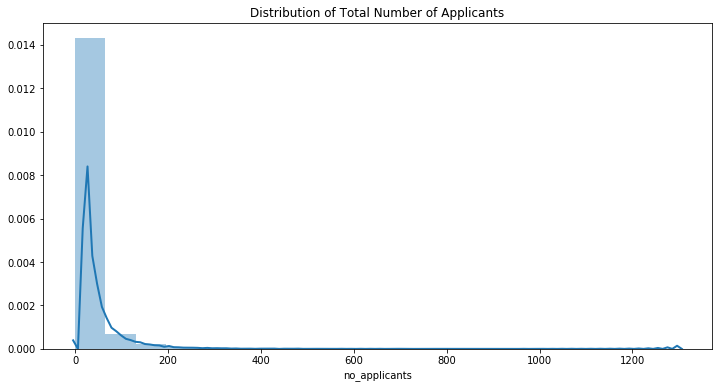

In [ ]:
# Distribution of total number of applicants
plt.figure(figsize=(12,6))

sns.distplot(df['no_applicants'],bins=20)

plt.title("Distribution of Total Number of Applicants")

print(df['no_applicants'].describe())
print(sum(df['no_applicants'] == 0)/float(len(df)))

Text(0, 0.5, 'No of Applicants')

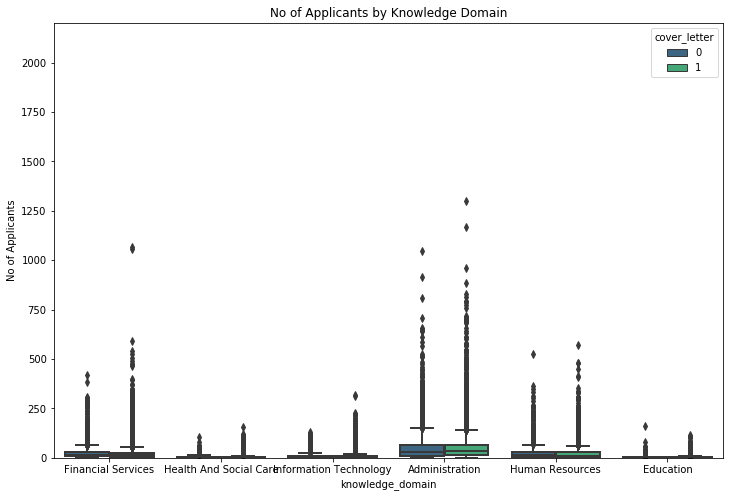

In [ ]:
# No of Applicants by Knowledge Domain
plt.figure(figsize=(12,8))

sns.boxplot(x='knowledge_domain',y='no_applicants',hue='cover_letter',data=df,palette='viridis')

plt.ylim(0,2200)
plt.title("No of Applicants by Knowledge Domain")
plt.ylabel("No of Applicants")

count                  90351
unique                     6
top       Financial Services
freq                   26154
Name: knowledge_domain, dtype: object
0.0


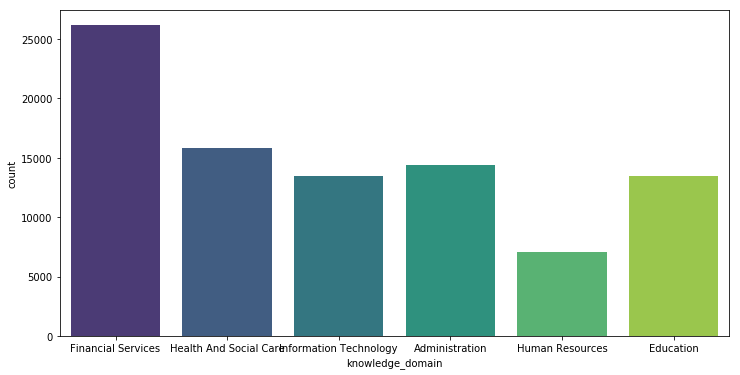

In [ ]:
# knowledge_domain
plt.figure(figsize=(12,6))

sns.countplot(df['knowledge_domain'],palette='viridis')

print(df['knowledge_domain'].describe())
print(sum(df['knowledge_domain'] == 0)/float(len(df)))

Text(0.5, 1.0, 'Distribution of Knowledge Domain by Eligibility to work in UK')

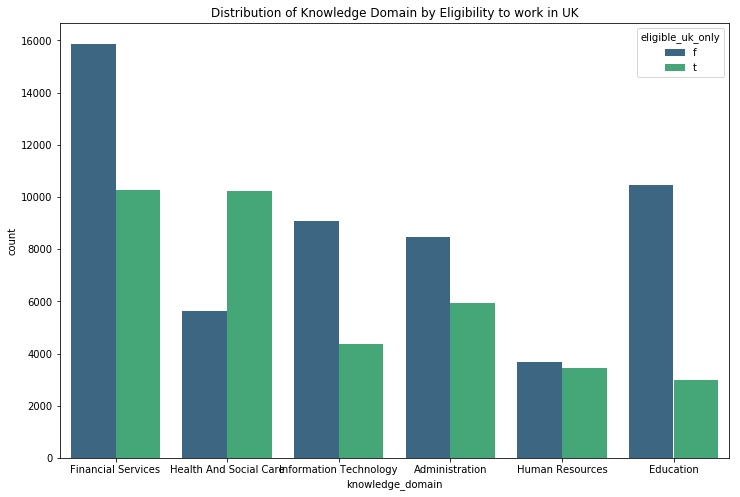

In [ ]:
# Distribution of Knowledge Domain by Eligibility to work in UK
plt.figure(figsize=(12,8))

sns.countplot(x='knowledge_domain',hue='eligible_uk_only',data=df,palette='viridis')

plt.title("Distribution of Knowledge Domain by Eligibility to work in UK")

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, '# Salary vs. # No of Applicants')

<Figure size 1152x576 with 0 Axes>

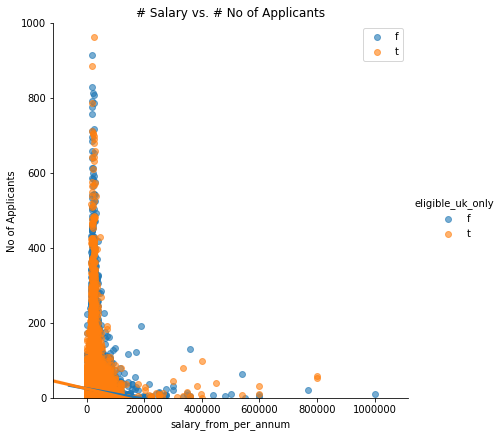

In [ ]:
# Salary vs. # No of Applicants
plt.figure(figsize=(16,8))

sns.lmplot(x='salary_from_per_annum',y='no_applicants',
           hue='eligible_uk_only',data=df,fit_reg=True,
          scatter_kws={'alpha':0.6},size=(6))

plt.legend()
plt.ylim(0,1000)
plt.ylabel("No of Applicants")
plt.title('# Salary vs. # No of Applicants')

In [ ]:
# shape of the dataset
df.shape

(90351, 37)

In [ ]:
# any missing values in the columns of the dataset
df.isnull().any()

job_id                        False
job_title                     False
no_applicants                 False
date_created                  False
knowledge_domain              False
job_description               False
has_formatting                False
featured_job                  False
cover_letter_preference_id    False
has_screening_questions       False
external_url                  False
postal_code                    True
has_salary                    False
has_skills                    False
easy_apply                    False
cover_letter                  False
job_type                      False
salary_type                   False
salary_from_per_annum         False
salary_to_per_annum           False
eligible_uk_only              False
display_style                 False
show_sponsored_links_ads      False
is_public                     False
is_graduate                   False
is_multilingual               False
is_exec_role                  False
is_fulltime                 

In [ ]:
# missing column function
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 37 columns and 90351 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
regionname,0,32606,36.1,32606,36.1,object
postal_code,0,18390,20.4,18390,20.4,object
townname,0,2100,2.3,2100,2.3,object
countyname,0,1481,1.6,1481,1.6,object
latitude,0,293,0.3,293,0.3,float64
longitude,0,293,0.3,293,0.3,float64


In [ ]:
# filling missing value columns
df['regionname'].fillna('e',inplace=True)
df['postal_code'].fillna('e',inplace=True)
df['townname'].fillna('e',inplace=True)
df['countyname'].fillna('e',inplace=True)

df['latitude'].fillna(0,inplace=True)
df['longitude'].fillna(0,inplace=True)

In [ ]:
# verifying to see any columns having missing values again
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 37 columns and 90351 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [ ]:
# checking the structure and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90351 entries, 0 to 90350
Data columns (total 37 columns):
job_id                        90351 non-null int64
job_title                     90351 non-null object
no_applicants                 90351 non-null int64
date_created                  90351 non-null datetime64[ns]
knowledge_domain              90351 non-null object
job_description               90351 non-null object
has_formatting                90351 non-null int64
featured_job                  90351 non-null int64
cover_letter_preference_id    90351 non-null int64
has_screening_questions       90351 non-null int64
external_url                  90351 non-null int64
postal_code                   90351 non-null object
has_salary                    90351 non-null int64
has_skills                    90351 non-null int64
easy_apply                    90351 non-null int64
cover_letter                  90351 non-null int64
job_type                      90351 non-null int64
salary_type

In [ ]:
# name of the columns
df.columns

Index(['job_id', 'job_title', 'no_applicants', 'date_created',
       'knowledge_domain', 'job_description', 'has_formatting', 'featured_job',
       'cover_letter_preference_id', 'has_screening_questions', 'external_url',
       'postal_code', 'has_salary', 'has_skills', 'easy_apply', 'cover_letter',
       'job_type', 'salary_type', 'salary_from_per_annum',
       'salary_to_per_annum', 'eligible_uk_only', 'display_style',
       'show_sponsored_links_ads', 'is_public', 'is_graduate',
       'is_multilingual', 'is_exec_role', 'is_fulltime', 'is_parttime',
       'is_branded', 'is_nationwide', 'company_type', 'townname', 'countyname',
       'regionname', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
# unique values in salary
print(df['salary_from_per_annum'].unique())
print(df['salary_to_per_annum'].unique())

[22000 18000 19000 ... 38097 18406 52260]
[25000 20000 19000 ... 28772 18406 97065]


90351
90351


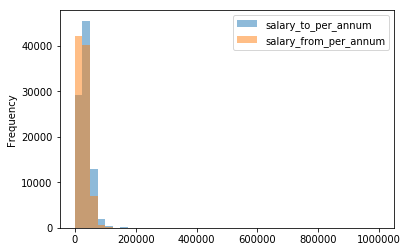

In [ ]:
# salary column distribution
df_columns = ['salary_to_per_annum','salary_from_per_annum']

print(df.shape[0])
df.dropna(subset=df_columns,inplace=True)
print(df.shape[0])

df[df_columns].plot.hist(alpha=0.5,bins=40);

In [ ]:
df['salary_average'] = (df['salary_to_per_annum'] + df['salary_from_per_annum']) / 2

In [ ]:
cols = ['salary_average','salary_to_per_annum','salary_from_per_annum']

df[cols].head()

,salary_average,salary_to_per_annum,salary_from_per_annum
0,23500.0,25000,22000
1,19000.0,20000,18000
2,19000.0,19000,19000
3,27500.0,27500,27500
4,37500.0,40000,35000


In [ ]:
# dropping column
drop_cols = ['salary_to_per_annum','salary_from_per_annum']
df = df.drop(drop_cols, axis=1)

df.shape

(90351, 36)

In [ ]:
# dropping columns
df.drop(['job_id', 'job_description', 'latitude', 'longitude'], axis=1, inplace=True)

df.head(5)

,job_title,no_applicants,date_created,knowledge_domain,has_formatting,featured_job,cover_letter_preference_id,has_screening_questions,external_url,postal_code,has_salary,has_skills,easy_apply,cover_letter,job_type,salary_type,eligible_uk_only,display_style,show_sponsored_links_ads,is_public,is_graduate,is_multilingual,is_exec_role,is_fulltime,is_parttime,is_branded,is_nationwide,company_type,townname,countyname,regionname,salary_average
0,Assistant Accountant - PLUS FULL STUDY SUPPORT,21,2017-07-14,Financial Services,1,0,1,0,1,BD,1,0,0,1,1,5,f,1,f,f,f,f,f,t,f,f,f,1,Chichester,West Sussex,South East England,23500.0
1,Credit Controller,6,2017-04-27,Financial Services,1,0,1,0,1,M,1,0,0,1,1,5,f,1,f,f,f,f,f,t,f,f,f,1,Mold,Clwyd,e,19000.0
2,Credit Controller,8,2017-03-07,Financial Services,0,0,1,0,1,S,1,0,0,1,1,5,t,1,f,f,f,f,f,t,f,f,f,1,Ashton-Under-Lyne,Lancashire,North West England,19000.0
3,Senior Credit Controller,38,2017-07-04,Financial Services,1,0,1,0,1,SL,1,0,0,1,1,5,f,1,f,f,f,f,f,t,f,f,f,1,Hayle,Cornwall,South West England,27500.0
4,Management Accountant,10,2017-04-06,Financial Services,1,0,1,0,1,M,1,0,0,1,1,5,t,1,f,f,f,f,f,t,f,f,f,1,Treorchy,Mid Glamorgan,e,37500.0


In [ ]:
# data type and their frequency
print("Data types and their frequency\n{}".format(df.dtypes.value_counts()))

Data types and their frequency
object            16
int64             14
datetime64[ns]     1
float64            1
dtype: int64


In [ ]:
# object columns that contain text which need to be converted into numeric features
object_columns_df = df.select_dtypes(include=['object'])

print(object_columns_df.iloc[0])

job_title                   Assistant Accountant - PLUS FULL STUDY SUPPORT
knowledge_domain                                        Financial Services
postal_code                                                             BD
eligible_uk_only                                                         f
show_sponsored_links_ads                                                 f
is_public                                                                f
is_graduate                                                              f
is_multilingual                                                          f
is_exec_role                                                             f
is_fulltime                                                              t
is_parttime                                                              f
is_branded                                                               f
is_nationwide                                                            f
townname                 

In [ ]:
# descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
df[['no_applicants', 'salary_average']].describe()

,no_applicants,salary_average
count,90351.000000,90351.000000
mean,20.241469,31811.841806
std,40.947716,21014.532952
min,0.000000,0.000000
25%,2.000000,20000.000000
50%,7.000000,29500.000000
75%,21.000000,37500.000000
max,1302.000000,999999.000000


Text(0, 0.5, 'Frequency')

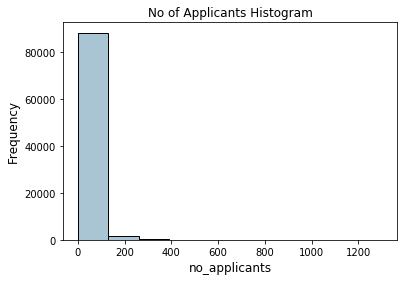

In [ ]:
# no of applicants distribution
fig, ax = plt.subplots()

df['no_applicants'].hist(color='#A9C5D3', edgecolor='black', grid=False)

ax.set_title('No of Applicants Histogram', fontsize=12)
ax.set_xlabel('no_applicants', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
#  take a 4-Quantile or a quartile based adaptive binning scheme
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['salary_average'].quantile(quantile_list)

quantiles

0.00         0.0
0.25     20000.0
0.50     29500.0
0.75     37500.0
1.00    999999.0
Name: salary_average, dtype: float64

Text(0, 0.5, 'Frequency')

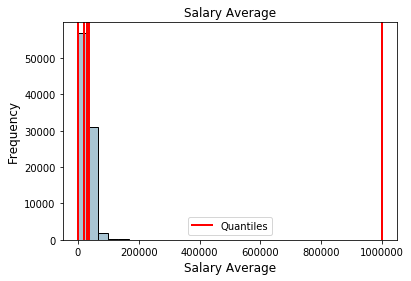

In [ ]:
#  visualize these quantiles in the original distribution histogram
fig, ax = plt.subplots()

df['salary_average'].hist(bins=30, color='#A9C5D3', edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
    
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Salary Average', fontsize=12)
ax.set_xlabel('Salary Average', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
# Binning numerical columns
df['CatSalary_average'] = pd.qcut(df.salary_average, q=4, labels=False )

df.head()

,job_title,no_applicants,date_created,knowledge_domain,has_formatting,featured_job,cover_letter_preference_id,has_screening_questions,external_url,postal_code,has_salary,has_skills,easy_apply,cover_letter,job_type,salary_type,eligible_uk_only,display_style,show_sponsored_links_ads,is_public,is_graduate,is_multilingual,is_exec_role,is_fulltime,is_parttime,is_branded,is_nationwide,company_type,townname,countyname,regionname,salary_average,CatSalary_average
0,Assistant Accountant - PLUS FULL STUDY SUPPORT,21,2017-07-14,Financial Services,1,0,1,0,1,BD,1,0,0,1,1,5,f,1,f,f,f,f,f,t,f,f,f,1,Chichester,West Sussex,South East England,23500.0,1
1,Credit Controller,6,2017-04-27,Financial Services,1,0,1,0,1,M,1,0,0,1,1,5,f,1,f,f,f,f,f,t,f,f,f,1,Mold,Clwyd,e,19000.0,0
2,Credit Controller,8,2017-03-07,Financial Services,0,0,1,0,1,S,1,0,0,1,1,5,t,1,f,f,f,f,f,t,f,f,f,1,Ashton-Under-Lyne,Lancashire,North West England,19000.0,0
3,Senior Credit Controller,38,2017-07-04,Financial Services,1,0,1,0,1,SL,1,0,0,1,1,5,f,1,f,f,f,f,f,t,f,f,f,1,Hayle,Cornwall,South West England,27500.0,1
4,Management Accountant,10,2017-04-06,Financial Services,1,0,1,0,1,M,1,0,0,1,1,5,t,1,f,f,f,f,f,t,f,f,f,1,Treorchy,Mid Glamorgan,e,37500.0,2


In [ ]:
# viewing salary columns
cols = ['salary_average','CatSalary_average']

df[cols].head()

,salary_average,CatSalary_average
0,23500.0,1
1,19000.0,0
2,19000.0,0
3,27500.0,1
4,37500.0,2


In [ ]:
df['log_salary'] = np.log((1+ df['salary_average']))

In [ ]:
# viewing salary columns
cols = ['salary_average','CatSalary_average','log_salary']

df[cols].head()

,salary_average,CatSalary_average,log_salary
0,23500.0,1,10.064798
1,19000.0,0,9.852247
2,19000.0,0,9.852247
3,27500.0,1,10.221978
4,37500.0,2,10.532123


In [ ]:
# value count of the column
df['eligible_uk_only'].value_counts()

f    53130
t    37221
Name: eligible_uk_only, dtype: int64

In [ ]:
# value count of the column
df['salary_type'].value_counts()

5    77496
1     9493
2     3362
Name: salary_type, dtype: int64

In [ ]:
df.columns

Index(['job_title', 'no_applicants', 'date_created', 'knowledge_domain',
       'has_formatting', 'featured_job', 'cover_letter_preference_id',
       'has_screening_questions', 'external_url', 'postal_code', 'has_salary',
       'has_skills', 'easy_apply', 'cover_letter', 'job_type', 'salary_type',
       'eligible_uk_only', 'display_style', 'show_sponsored_links_ads',
       'is_public', 'is_graduate', 'is_multilingual', 'is_exec_role',
       'is_fulltime', 'is_parttime', 'is_branded', 'is_nationwide',
       'company_type', 'townname', 'countyname', 'regionname',
       'salary_average', 'CatSalary_average', 'log_salary'],
      dtype='object')

no_applicants Statistical Summary:

count    90351.000000
mean        20.241469
std         40.947716
min          0.000000
25%          2.000000
50%          7.000000
75%         21.000000
max       1302.000000
Name: no_applicants, dtype: float64
Median no_applicants: 7.0
Skewness: 7.028666559797019


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


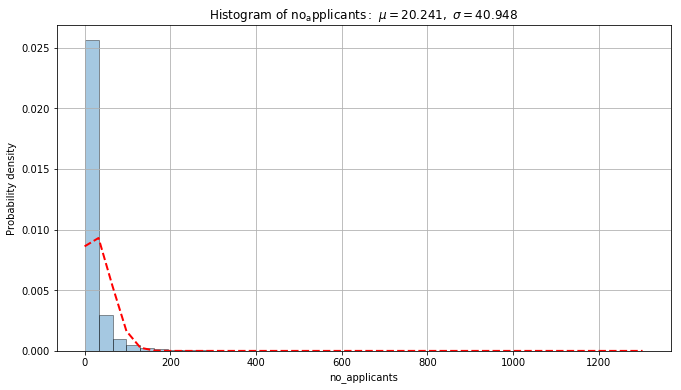

In [ ]:
# Statistical Summary of the target variable
print("no_applicants Statistical Summary:\n")
print(df['no_applicants'].describe())
print("Median no_applicants:", df['no_applicants'].median(axis = 0))
print('Skewness:',df['no_applicants'].skew())
skew = df['no_applicants'].skew()

# mean distribution
mu = df['no_applicants'].mean()

# std distribution
sigma = df['no_applicants'].std()
num_bins = 40

# Histogram of SalesPrice
plt.figure(figsize=(11, 6))
n, bins, patches = plt.hist(df['no_applicants'], num_bins, normed=1,edgecolor = 'black', lw = 1, alpha = .40)

# Normal Distribution
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('no_applicants')
plt.ylabel('Probability density')

plt.title(r'$\mathrm{Histogram\ of\ no_applicants:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
plt.grid(True)

#fig.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


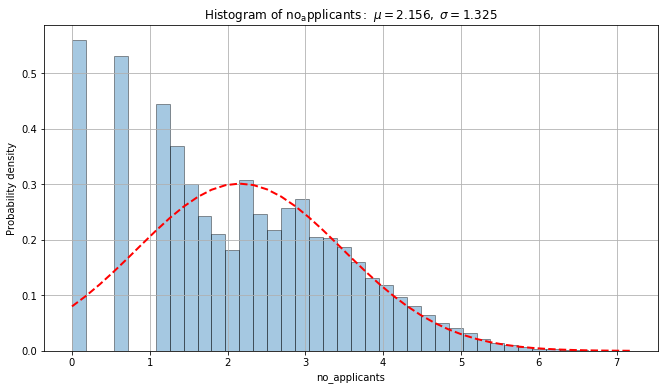

In [ ]:
# normalised target variable
no_applicants_norm = np.log1p(df['no_applicants'])

# Mean distribution
mu = no_applicants_norm.mean()

# Standard distribution
sigma = no_applicants_norm.std()
num_bins = 40
plt.figure(figsize=(11, 6))
n, bins, patches = plt.hist(no_applicants_norm, num_bins, normed=1, edgecolor = 'black', lw = 1,alpha = .40)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('no_applicants')
plt.ylabel('Probability density')

plt.title(r'$\mathrm{Histogram\ of\ no_applicants:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
plt.grid(True)

#fig.tight_layout()
plt.show()

In [ ]:
df['no_applicants_norm'] = no_applicants_norm

In [ ]:
# viewing target columns
cols = ['no_applicants','no_applicants_norm']

df[cols].head()

,no_applicants,no_applicants_norm
0,21,3.091042
1,6,1.945910
2,8,2.197225
3,38,3.663562
4,10,2.397895


In [ ]:
# Encode data
df['is_nationwide'] = df['is_nationwide'].map({'f':0,'t':1})
df['is_branded'] = df['is_branded'].map({'f':0,'t':1})
df['is_parttime'] = df['is_parttime'].map({'f':0,'t':1})
df['is_fulltime'] = df['is_fulltime'].map({'f':0,'t':1})
df['is_exec_role'] = df['is_exec_role'].map({'f':0,'t':1})
df['is_multilingual'] = df['is_multilingual'].map({'f':0,'t':1})
df['is_public'] = df['is_public'].map({'f':0,'t':1})
df['is_graduate'] = df['is_graduate'].map({'f':0,'t':1})
df['show_sponsored_links_ads'] = df['show_sponsored_links_ads'].map({'f':0,'t':1})
df['eligible_uk_only'] = df['eligible_uk_only'].map({'f':0,'t':1})

In [ ]:
df.head(2)

,job_title,no_applicants,date_created,knowledge_domain,has_formatting,featured_job,cover_letter_preference_id,has_screening_questions,external_url,postal_code,has_salary,has_skills,easy_apply,cover_letter,job_type,salary_type,eligible_uk_only,display_style,show_sponsored_links_ads,is_public,is_graduate,is_multilingual,is_exec_role,is_fulltime,is_parttime,is_branded,is_nationwide,company_type,townname,countyname,regionname,salary_average,CatSalary_average,log_salary,no_applicants_norm
0,Assistant Accountant - PLUS FULL STUDY SUPPORT,21,2017-07-14,Financial Services,1,0,1,0,1,BD,1,0,0,1,1,5,0,1,0,0,0,0,0,1,0,0,0,1,Chichester,West Sussex,South East England,23500.0,1,10.064798,3.091042
1,Credit Controller,6,2017-04-27,Financial Services,1,0,1,0,1,M,1,0,0,1,1,5,0,1,0,0,0,0,0,1,0,0,0,1,Mold,Clwyd,e,19000.0,0,9.852247,1.945910


In [ ]:
df.columns

Index(['job_title', 'no_applicants', 'date_created', 'knowledge_domain',
       'has_formatting', 'featured_job', 'cover_letter_preference_id',
       'has_screening_questions', 'external_url', 'postal_code', 'has_salary',
       'has_skills', 'easy_apply', 'cover_letter', 'job_type', 'salary_type',
       'eligible_uk_only', 'display_style', 'show_sponsored_links_ads',
       'is_public', 'is_graduate', 'is_multilingual', 'is_exec_role',
       'is_fulltime', 'is_parttime', 'is_branded', 'is_nationwide',
       'company_type', 'townname', 'countyname', 'regionname',
       'salary_average', 'CatSalary_average', 'log_salary',
       'no_applicants_norm'],
      dtype='object')

In [ ]:
# creating function for feature engineering on date column
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [ ]:
fld = df.date_created
fld.dt.year

0        2017
1        2017
2        2017
3        2017
4        2017
5        2017
6        2017
7        2017
8        2017
9        2017
10       2017
11       2017
12       2017
13       2017
14       2017
15       2017
16       2017
17       2017
18       2017
19       2017
20       2017
21       2017
22       2017
23       2017
24       2017
25       2017
26       2017
27       2017
28       2017
29       2017
         ... 
90321    2017
90322    2017
90323    2017
90324    2017
90325    2017
90326    2017
90327    2017
90328    2017
90329    2017
90330    2017
90331    2017
90332    2017
90333    2017
90334    2017
90335    2017
90336    2017
90337    2017
90338    2017
90339    2017
90340    2017
90341    2017
90342    2017
90343    2017
90344    2017
90345    2017
90346    2017
90347    2017
90348    2017
90349    2017
90350    2017
Name: date_created, Length: 90351, dtype: int64

In [ ]:
# calling date function
add_datepart(df, 'date_created')

In [ ]:
df.columns

Index(['job_title', 'no_applicants', 'knowledge_domain', 'has_formatting',
       'featured_job', 'cover_letter_preference_id', 'has_screening_questions',
       'external_url', 'postal_code', 'has_salary', 'has_skills', 'easy_apply',
       'cover_letter', 'job_type', 'salary_type', 'eligible_uk_only',
       'display_style', 'show_sponsored_links_ads', 'is_public', 'is_graduate',
       'is_multilingual', 'is_exec_role', 'is_fulltime', 'is_parttime',
       'is_branded', 'is_nationwide', 'company_type', 'townname', 'countyname',
       'regionname', 'salary_average', 'CatSalary_average', 'log_salary',
       'no_applicants_norm', 'date_createdYear', 'date_createdMonth',
       'date_createdWeek', 'date_createdDay', 'date_createdDayofweek',
       'date_createdDayofyear', 'date_createdIs_month_end',
       'date_createdIs_month_start', 'date_createdIs_quarter_end',
       'date_createdIs_quarter_start', 'date_createdIs_year_end',
       'date_createdIs_year_start', 'date_createdElapse

In [ ]:
df.head(2)

,job_title,no_applicants,knowledge_domain,has_formatting,featured_job,cover_letter_preference_id,has_screening_questions,external_url,postal_code,has_salary,has_skills,easy_apply,cover_letter,job_type,salary_type,eligible_uk_only,display_style,show_sponsored_links_ads,is_public,is_graduate,is_multilingual,is_exec_role,is_fulltime,is_parttime,is_branded,is_nationwide,company_type,townname,countyname,regionname,salary_average,CatSalary_average,log_salary,no_applicants_norm,date_createdYear,date_createdMonth,date_createdWeek,date_createdDay,date_createdDayofweek,date_createdDayofyear,date_createdIs_month_end,date_createdIs_month_start,date_createdIs_quarter_end,date_createdIs_quarter_start,date_createdIs_year_end,date_createdIs_year_start,date_createdElapsed
0,Assistant Accountant - PLUS FULL STUDY SUPPORT,21,Financial Services,1,0,1,0,1,BD,1,0,0,1,1,5,0,1,0,0,0,0,0,1,0,0,0,1,Chichester,West Sussex,South East England,23500.0,1,10.064798,3.091042,2017,7,28,14,4,195,False,False,False,False,False,False,1499990400
1,Credit Controller,6,Financial Services,1,0,1,0,1,M,1,0,0,1,1,5,0,1,0,0,0,0,0,1,0,0,0,1,Mold,Clwyd,e,19000.0,0,9.852247,1.945910,2017,4,17,27,3,117,False,False,False,False,False,False,1493251200


In [ ]:
# value count of the column
df['knowledge_domain'].value_counts()

Financial Services        26154
Health And Social Care    15849
Administration            14388
Information Technology    13433
Education                 13427
Human Resources            7100
Name: knowledge_domain, dtype: int64

In [ ]:
# dummy encoding done on 5 values out of 6 values
df['Financial Services'] = pd.get_dummies(df['knowledge_domain'])['Financial Services']
df['Administration'] = pd.get_dummies(df['knowledge_domain'])['Administration']
df['Health And Social Care'] = pd.get_dummies(df['knowledge_domain'])['Health And Social Care']
df['Education'] = pd.get_dummies(df['knowledge_domain'])['Education']
df['Information Technology'] = pd.get_dummies(df['knowledge_domain'])['Information Technology']

In [ ]:
df = df.drop(['knowledge_domain'], axis=1)

In [ ]:
df.head(2)

,job_title,no_applicants,has_formatting,featured_job,cover_letter_preference_id,has_screening_questions,external_url,postal_code,has_salary,has_skills,easy_apply,cover_letter,job_type,salary_type,eligible_uk_only,display_style,show_sponsored_links_ads,is_public,is_graduate,is_multilingual,is_exec_role,is_fulltime,is_parttime,is_branded,is_nationwide,...,townname,countyname,regionname,salary_average,CatSalary_average,log_salary,no_applicants_norm,date_createdYear,date_createdMonth,date_createdWeek,date_createdDay,date_createdDayofweek,date_createdDayofyear,date_createdIs_month_end,date_createdIs_month_start,date_createdIs_quarter_end,date_createdIs_quarter_start,date_createdIs_year_end,date_createdIs_year_start,date_createdElapsed,Financial Services,Administration,Health And Social Care,Education,Information Technology
0,Assistant Accountant - PLUS FULL STUDY SUPPORT,21,1,0,1,0,1,BD,1,0,0,1,1,5,0,1,0,0,0,0,0,1,0,0,0,...,Chichester,West Sussex,South East England,23500.0,1,10.064798,3.091042,2017,7,28,14,4,195,False,False,False,False,False,False,1499990400,1,0,0,0,0
1,Credit Controller,6,1,0,1,0,1,M,1,0,0,1,1,5,0,1,0,0,0,0,0,1,0,0,0,...,Mold,Clwyd,e,19000.0,0,9.852247,1.945910,2017,4,17,27,3,117,False,False,False,False,False,False,1493251200,1,0,0,0,0


In [ ]:
# dummy encoding
df['salary_type_1'] = pd.get_dummies(df['salary_type'])[1]
df['salary_type_2'] = pd.get_dummies(df['salary_type'])[2]

In [ ]:
# dropping the original column
df = df.drop(['salary_type'], axis=1)

In [ ]:
df.head(2)

,job_title,no_applicants,has_formatting,featured_job,cover_letter_preference_id,has_screening_questions,external_url,postal_code,has_salary,has_skills,easy_apply,cover_letter,job_type,eligible_uk_only,display_style,show_sponsored_links_ads,is_public,is_graduate,is_multilingual,is_exec_role,is_fulltime,is_parttime,is_branded,is_nationwide,company_type,...,regionname,salary_average,CatSalary_average,log_salary,no_applicants_norm,date_createdYear,date_createdMonth,date_createdWeek,date_createdDay,date_createdDayofweek,date_createdDayofyear,date_createdIs_month_end,date_createdIs_month_start,date_createdIs_quarter_end,date_createdIs_quarter_start,date_createdIs_year_end,date_createdIs_year_start,date_createdElapsed,Financial Services,Administration,Health And Social Care,Education,Information Technology,salary_type_1,salary_type_2
0,Assistant Accountant - PLUS FULL STUDY SUPPORT,21,1,0,1,0,1,BD,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,...,South East England,23500.0,1,10.064798,3.091042,2017,7,28,14,4,195,False,False,False,False,False,False,1499990400,1,0,0,0,0,0,0
1,Credit Controller,6,1,0,1,0,1,M,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,...,e,19000.0,0,9.852247,1.945910,2017,4,17,27,3,117,False,False,False,False,False,False,1493251200,1,0,0,0,0,0,0


In [ ]:
df.columns

Index(['job_title', 'no_applicants', 'has_formatting', 'featured_job',
       'cover_letter_preference_id', 'has_screening_questions', 'external_url',
       'postal_code', 'has_salary', 'has_skills', 'easy_apply', 'cover_letter',
       'job_type', 'eligible_uk_only', 'display_style',
       'show_sponsored_links_ads', 'is_public', 'is_graduate',
       'is_multilingual', 'is_exec_role', 'is_fulltime', 'is_parttime',
       'is_branded', 'is_nationwide', 'company_type', 'townname', 'countyname',
       'regionname', 'salary_average', 'CatSalary_average', 'log_salary',
       'no_applicants_norm', 'date_createdYear', 'date_createdMonth',
       'date_createdWeek', 'date_createdDay', 'date_createdDayofweek',
       'date_createdDayofyear', 'date_createdIs_month_end',
       'date_createdIs_month_start', 'date_createdIs_quarter_end',
       'date_createdIs_quarter_start', 'date_createdIs_year_end',
       'date_createdIs_year_start', 'date_createdElapsed',
       'Financial Services', 'A

In [ ]:
# dummy encoding
df['is_nationwide_0'] = pd.get_dummies(df['is_nationwide'])[0]
df['is_branded_0'] = pd.get_dummies(df['is_branded'])[0]
df['is_parttime_0'] = pd.get_dummies(df['is_parttime'])[0]
df['is_fulltime_0'] = pd.get_dummies(df['is_fulltime'])[0]
df['is_exec_role_0'] = pd.get_dummies(df['is_exec_role'])[0]
df['is_multilingual_0'] = pd.get_dummies(df['is_multilingual'])[0]
df['is_public_0'] = pd.get_dummies(df['is_public'])[0]
df['is_graduate_0'] = pd.get_dummies(df['is_graduate'])[0]
df['show_sponsored_links_ads_0'] = pd.get_dummies(df['show_sponsored_links_ads'])[0]
df['eligible_uk_only_0'] = pd.get_dummies(df['eligible_uk_only'])[0]

In [ ]:
# dropping the original column
df = df.drop(['is_nationwide','is_branded', 'is_parttime', 'is_fulltime', 'is_exec_role',
             'is_multilingual','is_public', 'is_graduate', 'show_sponsored_links_ads',
             'eligible_uk_only'], axis=1)

In [ ]:
df.columns

Index(['job_title', 'no_applicants', 'has_formatting', 'featured_job',
       'cover_letter_preference_id', 'has_screening_questions', 'external_url',
       'postal_code', 'has_salary', 'has_skills', 'easy_apply', 'cover_letter',
       'job_type', 'display_style', 'company_type', 'townname', 'countyname',
       'regionname', 'salary_average', 'CatSalary_average', 'log_salary',
       'no_applicants_norm', 'date_createdYear', 'date_createdMonth',
       'date_createdWeek', 'date_createdDay', 'date_createdDayofweek',
       'date_createdDayofyear', 'date_createdIs_month_end',
       'date_createdIs_month_start', 'date_createdIs_quarter_end',
       'date_createdIs_quarter_start', 'date_createdIs_year_end',
       'date_createdIs_year_start', 'date_createdElapsed',
       'Financial Services', 'Administration', 'Health And Social Care',
       'Education', 'Information Technology', 'salary_type_1', 'salary_type_2',
       'is_nationwide_0', 'is_branded_0', 'is_parttime_0', 'is_fulltime

In [ ]:
print("Data types and their frequency\n{}".format(df.dtypes.value_counts()))

Data types and their frequency
int64      21
uint8      17
bool        6
object      5
float64     3
dtype: int64


In [ ]:
object_columns_df = df.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

job_title      Assistant Accountant - PLUS FULL STUDY SUPPORT
postal_code                                                BD
townname                                           Chichester
countyname                                        West Sussex
regionname                                 South East England
Name: 0, dtype: object


In [ ]:
int_columns_df = df.select_dtypes(include=['int64'])
print(int_columns_df.iloc[0])

no_applicants                         21
has_formatting                         1
featured_job                           0
cover_letter_preference_id             1
has_screening_questions                0
external_url                           1
has_salary                             1
has_skills                             0
easy_apply                             0
cover_letter                           1
job_type                               1
display_style                          1
company_type                           1
CatSalary_average                      1
date_createdYear                    2017
date_createdMonth                      7
date_createdWeek                      28
date_createdDay                       14
date_createdDayofweek                  4
date_createdDayofyear                195
date_createdElapsed           1499990400
Name: 0, dtype: int64


In [ ]:
cols = ['job_title', 'postal_code','townname', 'countyname', 'regionname']
for name in cols:
    print(name,':')
    print(df[name].value_counts(),'\n')

job_title :
Management Accountant                                                                   2151
Accounts Assistant                                                                      2148
Credit Controller                                                                       1496
Finance Manager                                                                         1485
Customer Service Advisor                                                                1261
Financial Controller                                                                    1215
Administrator                                                                           1097
Assistant Accountant                                                                     971
Purchase Ledger Clerk                                                                    927
Sales Administrator                                                                      823
Financial Accountant                                      

In [ ]:
cols = ['has_formatting', 'featured_job',
       'cover_letter_preference_id', 'has_screening_questions', 'external_url',
        'has_salary', 'has_skills', 'easy_apply', 'cover_letter',
       'job_type', 'display_style', 'company_type']

for name in cols:
    print(name,':')
    print(df[name].value_counts(),'\n')

has_formatting :
1    59863
0    30488
Name: has_formatting, dtype: int64 

featured_job :
0    83609
1     6742
Name: featured_job, dtype: int64 

cover_letter_preference_id :
1    74542
3    15235
2      574
Name: cover_letter_preference_id, dtype: int64 

has_screening_questions :
0    79819
1    10532
Name: has_screening_questions, dtype: int64 

external_url :
1    90351
Name: external_url, dtype: int64 

has_salary :
1    88199
0     2152
Name: has_salary, dtype: int64 

has_skills :
0    90351
Name: has_skills, dtype: int64 

easy_apply :
0    82941
1     7410
Name: easy_apply, dtype: int64 

cover_letter :
1    75116
0    15235
Name: cover_letter, dtype: int64 

job_type :
1    90348
2        2
4        1
Name: job_type, dtype: int64 

display_style :
1    79847
2     6742
0     3762
Name: display_style, dtype: int64 

company_type :
1    84752
2     5477
3      122
Name: company_type, dtype: int64 



In [ ]:
# dummy encoding
df['has_formatting_0'] = pd.get_dummies(df['has_formatting'])[0]
df['featured_job_0'] = pd.get_dummies(df['featured_job'])[0]
df['cover_letter_preference_id_1'] = pd.get_dummies(df['cover_letter_preference_id'])[1]
df['cover_letter_preference_id_2'] = pd.get_dummies(df['cover_letter_preference_id'])[2]
df['has_screening_questions_0'] = pd.get_dummies(df['has_screening_questions'])[0]
df['has_salary_0'] = pd.get_dummies(df['has_salary'])[0]
df['easy_apply_0'] = pd.get_dummies(df['easy_apply'])[0]
df['cover_letter_0'] = pd.get_dummies(df['cover_letter'])[0]
df['job_type_1'] = pd.get_dummies(df['job_type'])[1]
df['job_type_2'] = pd.get_dummies(df['job_type'])[2]
df['display_style_1'] = pd.get_dummies(df['display_style'])[1]
df['display_style_2'] = pd.get_dummies(df['display_style'])[2]
df['company_type_1'] = pd.get_dummies(df['company_type'])[1]
df['company_type_2'] = pd.get_dummies(df['company_type'])[2]

In [ ]:
# dropping the original column
df = df.drop(['has_formatting', 'featured_job',
       'cover_letter_preference_id', 'has_screening_questions', 
        'has_salary', 'easy_apply', 'cover_letter',
       'job_type', 'display_style', 'company_type'], axis=1)

In [ ]:
df.head(2)

,job_title,no_applicants,external_url,postal_code,has_skills,townname,countyname,regionname,salary_average,CatSalary_average,log_salary,no_applicants_norm,date_createdYear,date_createdMonth,date_createdWeek,date_createdDay,date_createdDayofweek,date_createdDayofyear,date_createdIs_month_end,date_createdIs_month_start,date_createdIs_quarter_end,date_createdIs_quarter_start,date_createdIs_year_end,date_createdIs_year_start,date_createdElapsed,...,salary_type_2,is_nationwide_0,is_branded_0,is_parttime_0,is_fulltime_0,is_exec_role_0,is_multilingual_0,is_public_0,is_graduate_0,show_sponsored_links_ads_0,eligible_uk_only_0,has_formatting_0,featured_job_0,cover_letter_preference_id_1,cover_letter_preference_id_2,has_screening_questions_0,has_salary_0,easy_apply_0,cover_letter_0,job_type_1,job_type_2,display_style_1,display_style_2,company_type_1,company_type_2
0,Assistant Accountant - PLUS FULL STUDY SUPPORT,21,1,BD,0,Chichester,West Sussex,South East England,23500.0,1,10.064798,3.091042,2017,7,28,14,4,195,False,False,False,False,False,False,1499990400,...,0,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
1,Credit Controller,6,1,M,0,Mold,Clwyd,e,19000.0,0,9.852247,1.945910,2017,4,17,27,3,117,False,False,False,False,False,False,1493251200,...,0,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90351 entries, 0 to 90350
Data columns (total 56 columns):
job_title                       90351 non-null object
no_applicants                   90351 non-null int64
external_url                    90351 non-null int64
postal_code                     90351 non-null object
has_skills                      90351 non-null int64
townname                        90351 non-null object
countyname                      90351 non-null object
regionname                      90351 non-null object
salary_average                  90351 non-null float64
CatSalary_average               90351 non-null int64
log_salary                      90351 non-null float64
no_applicants_norm              90351 non-null float64
date_createdYear                90351 non-null int64
date_createdMonth               90351 non-null int64
date_createdWeek                90351 non-null int64
date_createdDay                 90351 non-null int64
date_createdDayofweek           

In [ ]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [ ]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

In [ ]:
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,job_title,postal_code,townname,countyname,regionname
0,2667,271,176,87,4
1,6517,2507,507,14,8
2,6517,3819,30,47,3
3,27533,4122,352,15,5
4,17799,2507,754,52,8
5,17799,1356,267,80,4
6,11051,5351,753,35,8
7,28643,3709,472,5,4
8,6209,1251,193,23,3
9,1178,5101,727,2,8


In [ ]:
df.dtypes

job_title                         int64
no_applicants                     int64
external_url                      int64
postal_code                       int64
has_skills                        int64
townname                          int64
countyname                        int64
regionname                        int64
salary_average                  float64
CatSalary_average                 int64
log_salary                      float64
no_applicants_norm              float64
date_createdYear                  int64
date_createdMonth                 int64
date_createdWeek                  int64
date_createdDay                   int64
date_createdDayofweek             int64
date_createdDayofyear             int64
date_createdIs_month_end           bool
date_createdIs_month_start         bool
date_createdIs_quarter_end         bool
date_createdIs_quarter_start       bool
date_createdIs_year_end            bool
date_createdIs_year_start          bool
date_createdElapsed               int64


In [ ]:
df.columns

Index(['job_title', 'no_applicants', 'external_url', 'postal_code',
       'has_skills', 'townname', 'countyname', 'regionname', 'salary_average',
       'CatSalary_average', 'log_salary', 'no_applicants_norm',
       'date_createdYear', 'date_createdMonth', 'date_createdWeek',
       'date_createdDay', 'date_createdDayofweek', 'date_createdDayofyear',
       'date_createdIs_month_end', 'date_createdIs_month_start',
       'date_createdIs_quarter_end', 'date_createdIs_quarter_start',
       'date_createdIs_year_end', 'date_createdIs_year_start',
       'date_createdElapsed', 'Financial Services', 'Administration',
       'Health And Social Care', 'Education', 'Information Technology',
       'salary_type_1', 'salary_type_2', 'is_nationwide_0', 'is_branded_0',
       'is_parttime_0', 'is_fulltime_0', 'is_exec_role_0', 'is_multilingual_0',
       'is_public_0', 'is_graduate_0', 'show_sponsored_links_ads_0',
       'eligible_uk_only_0', 'has_formatting_0', 'featured_job_0',
       'cover_

In [ ]:
x = df[['job_title', 'external_url', 'postal_code',
       'has_skills', 'townname', 'countyname', 'regionname', 'salary_average',
       'CatSalary_average', 'log_salary', 
       'date_createdYear', 'date_createdMonth', 'date_createdWeek',
       'date_createdDay', 'date_createdDayofweek', 'date_createdDayofyear',
       'date_createdIs_month_end', 'date_createdIs_month_start',
       'date_createdIs_quarter_end', 'date_createdIs_quarter_start',
       'date_createdIs_year_end', 'date_createdIs_year_start',
       'date_createdElapsed', 'Financial Services', 'Administration',
       'Health And Social Care', 'Education', 'Information Technology',
       'salary_type_1', 'salary_type_2', 'is_nationwide_0', 'is_branded_0',
       'is_parttime_0', 'is_fulltime_0', 'is_exec_role_0', 'is_multilingual_0',
       'is_public_0', 'is_graduate_0', 'show_sponsored_links_ads_0',
       'eligible_uk_only_0', 'has_formatting_0', 'featured_job_0',
       'cover_letter_preference_id_1', 'cover_letter_preference_id_2',
       'has_screening_questions_0', 'has_salary_0', 'easy_apply_0',
       'cover_letter_0', 'job_type_1', 'job_type_2', 'display_style_1',
       'display_style_2', 'company_type_1', 'company_type_2']]

y = df['no_applicants']

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_test.count()

18071

In [ ]:
x_test.columns

Index(['job_title', 'external_url', 'postal_code', 'has_skills', 'townname',
       'countyname', 'regionname', 'salary_average', 'CatSalary_average',
       'log_salary', 'date_createdYear', 'date_createdMonth',
       'date_createdWeek', 'date_createdDay', 'date_createdDayofweek',
       'date_createdDayofyear', 'date_createdIs_month_end',
       'date_createdIs_month_start', 'date_createdIs_quarter_end',
       'date_createdIs_quarter_start', 'date_createdIs_year_end',
       'date_createdIs_year_start', 'date_createdElapsed',
       'Financial Services', 'Administration', 'Health And Social Care',
       'Education', 'Information Technology', 'salary_type_1', 'salary_type_2',
       'is_nationwide_0', 'is_branded_0', 'is_parttime_0', 'is_fulltime_0',
       'is_exec_role_0', 'is_multilingual_0', 'is_public_0', 'is_graduate_0',
       'show_sponsored_links_ads_0', 'eligible_uk_only_0', 'has_formatting_0',
       'featured_job_0', 'cover_letter_preference_id_1',
       'cover_letter_

In [ ]:
reg = linear_model.LinearRegression(normalize=True)
lasso = linear_model.Lasso(normalize=True)
reg.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
reg.coef_

array([-2.67404e-04,  1.37235e+15,  1.12129e-03,  7.53243e+13,  3.04317e-03,  5.45120e-02,  6.45510e-01,
       -3.41836e-05, -1.04185e+00,  2.47966e+00, -2.20203e+13, -1.48194e+01,  4.01001e+08, -4.87526e-01,
        5.72858e+07,  2.97667e+09,  1.18663e+00,  1.16179e+00, -3.29185e+00,  5.43808e+00,  1.61750e+12,
       -2.08520e+10, -3.51152e+04, -2.42712e+00,  2.89921e+01, -2.19734e+01, -2.68763e+01, -1.37515e+01,
       -4.39829e+00,  2.98467e+00, -5.17628e+01, -5.28177e+11, -5.28894e+00,  2.61827e+00,  2.36460e+00,
        9.04687e+00, -7.73765e+00, -2.03003e+00,  1.15756e+00,  1.13060e+00, -3.82136e-01,  9.24562e+11,
        1.99789e+12,  1.99789e+12, -1.73951e+00,  1.05561e+01, -7.57223e+00,  1.99789e+12,  3.71316e+01,
        4.52444e+01, -1.29445e+00,  9.24562e+11, -3.65950e+00, -3.26280e+00])

In [ ]:
lasso.coef_

array([-0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
        0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
       -0., -0., -0.,  0., -0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.])

In [ ]:
pred = reg.predict(x_test)
pred_train = reg.predict(x_train)

lpred = lasso.predict(x_test)
lpred_train = lasso.predict(x_train)

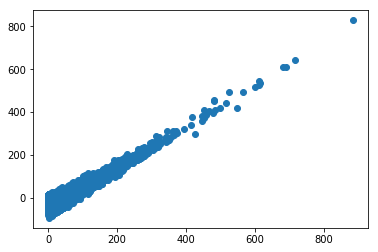

In [ ]:
LRerror = y_test - pred
plt.scatter(y_test, LRerror)
#plt.ylim(-400,400)
#plt.xlim(0,450)

(0, 450)

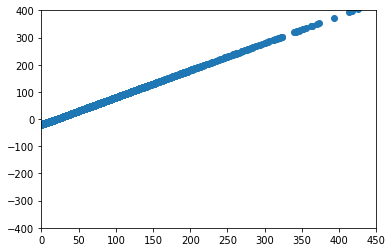

In [ ]:
LSerror = y_test - lpred
plt.scatter(y_test, LSerror)
plt.ylim(-400,400)
plt.xlim(0,450)

In [ ]:
testScore = r2_score(y_pred=pred,y_true=y_test)
trainScore = r2_score(y_pred=pred_train,y_true=y_train)

ltestScore = r2_score(y_pred=lpred,y_true=y_test)
ltrainScore = r2_score(y_pred=lpred_train,y_true=y_train)

In [ ]:
lrResults = pd.DataFrame()

lrResults['Score'] = [trainScore,testScore]
lrResults['Step'] = ['train','test']

lrResults

,Score,Step
0,0.119451,train
1,0.125744,test


In [ ]:
lassoResults = pd.DataFrame()

lassoResults['Score'] = [ltrainScore,ltestScore]
lassoResults['Step'] = ['train','test']

lassoResults

,Score,Step
0,0.000000e+00,train
1,-1.288900e-07,test


Text(0.5, 1.0, 'R^2 Scores')

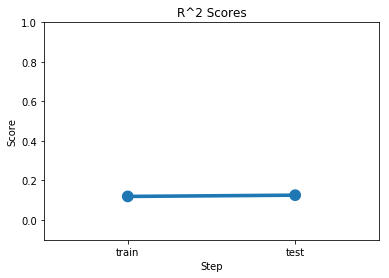

In [ ]:
sns.pointplot(y=lrResults['Score'],x=lrResults['Step'])

plt.ylim([-.1,1])
plt.title('R^2 Scores')

In [ ]:
rf = RandomForestRegressor(n_estimators=500,min_samples_split=10)

rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)

test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print("Test data R-2 score: {}".format(test_score))
print("Test data Spearman correlation: {}".format(spearman[0]))
print("Test data Pearson correlation: {}".format(pearson[0]))

Test data R-2 score: 0.5724319525769485
Test data Spearman correlation: 0.8389156969525909
Test data Pearson correlation: 0.7568531407358647


In [ ]:
train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print("Train data R-2 score: {}".format(train_score))
print("Train data Spearman correlation: {}".format(spearmanTrain[0]))
print("Train data Pearson correlation: {}".format(pearsonTrain[0]))

 
Train data R-2 score: 0.8323929052902822
Train data Spearman correlation: 0.932620158925729
Train data Pearson correlation: 0.9200499588081661


In [ ]:
RFperf = pd.DataFrame()

RFperf['Score'] = [train_score,test_score]
RFperf['Step'] = ['train','test']

RFperf

,Score,Step
0,0.832393,train
1,0.572432,test


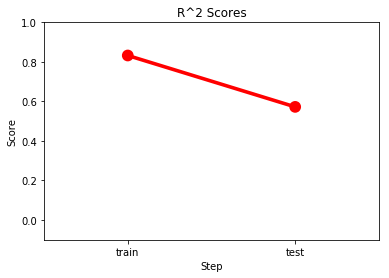

In [ ]:
sns.pointplot(y=RFperf['Score'],x=RFperf['Step'],color='Red')

plt.ylim([-.1,1])
plt.title('R^2 Scores')
plt.savefig('RFScores.png',bbox_inches='tight')

In [ ]:
# Important Variables
predicted_test = rf.predict(x_test)

fI = pd.DataFrame()
fI['Variable'] = list(x_train.columns)
fI['Importance'] = rf.feature_importances_
fI.sort_values(by='Importance',ascending=False)[0:15]

,Variable,Importance
0,job_title,0.252673
24,Administration,0.162091
2,postal_code,0.074639
5,countyname,0.072813
9,log_salary,0.070309
7,salary_average,0.067832
4,townname,0.048672
13,date_createdDay,0.033251
23,Financial Services,0.029776
22,date_createdElapsed,0.023987


In [ ]:
# Top variables for successful job posting
topVars= list(fI.sort_values(by='Importance',ascending=False)[0:15]['Variable'])

topVars

['job_title',
 'Administration',
 'postal_code',
 'countyname',
 'log_salary',
 'salary_average',
 'townname',
 'date_createdDay',
 'Financial Services',
 'date_createdElapsed',
 'date_createdDayofyear',
 'date_createdDayofweek',
 'date_createdWeek',
 'regionname',
 'is_graduate_0']

In [ ]:
x = df[topVars]
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=50)

In [ ]:
rf = RandomForestRegressor(n_estimators=500,min_samples_split=15)

rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=15, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)

test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print("Test data R-2 score: {}".format(test_score))
print("Test data Spearman correlation: {}".format(spearman[0]))
print("Test data Pearson correlation: {}".format(pearson[0]))

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print("Train data R-2 score: {}".format(train_score))
print("Train data Spearman correlation: {}".format(spearmanTrain[0]))
print("Train data Pearson correlation: {}".format(pearsonTrain[0]))

Test data R-2 score: 0.527787514175442
Test data Spearman correlation: 0.8186147972870987
Test data Pearson correlation: 0.7275317108249446
 
Train data R-2 score: 0.7807492522963456
Train data Spearman correlation: 0.9065414977034124
Train data Pearson correlation: 0.8916680548211198


In [ ]:
x = df[['job_title', 'external_url', 'postal_code',
       'has_skills', 'townname', 'countyname', 'regionname', 'salary_average',
       'CatSalary_average', 'log_salary', 
       'date_createdYear', 'date_createdMonth', 'date_createdWeek',
       'date_createdDay', 'date_createdDayofweek', 'date_createdDayofyear',
       'date_createdIs_month_end', 'date_createdIs_month_start',
       'date_createdIs_quarter_end', 'date_createdIs_quarter_start',
       'date_createdIs_year_end', 'date_createdIs_year_start',
       'date_createdElapsed', 'Financial Services', 'Administration',
       'Health And Social Care', 'Education', 'Information Technology',
       'salary_type_1', 'salary_type_2', 'is_nationwide_0', 'is_branded_0',
       'is_parttime_0', 'is_fulltime_0', 'is_exec_role_0', 'is_multilingual_0',
       'is_public_0', 'is_graduate_0', 'show_sponsored_links_ads_0',
       'eligible_uk_only_0', 'has_formatting_0', 'featured_job_0',
       'cover_letter_preference_id_1', 'cover_letter_preference_id_2',
       'has_screening_questions_0', 'has_salary_0', 'easy_apply_0',
       'cover_letter_0', 'job_type_1', 'job_type_2', 'display_style_1',
       'display_style_2', 'company_type_1', 'company_type_2']]

y = df['no_applicants']

In [ ]:
# f_regression: Used only for numeric targets and based on linear regression performance.
# f_classif: Used only for categorical targets, based on Analysis of Variance (ANOVA) statistical test.
# chi2: Performs the chi-square statistic for categorical targets, which is less sensible to the nonlinear relationship between the predictive variable and its target.

# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=20)

# Fit and transform
x_best = selector_f.fit_transform(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value enco

In [ ]:
# In choosing the percentile cutoff, I took a Pareto 80/20 approach and selected the top 20% best, associated features.
# However, I will review the F-score and p-values to confirm that 20% is an appropriate percentile 
# to exclude a feature from participating in the learning process.
support = np.asarray(selector_f.get_support())

# Enable scientific notation
pd.set_option('display.float_format', '{:.2e}'.format)

# Column names of top 20%
features = np.asarray(x.columns.values)
features_with_support = features[support]

# f-scores of top 20%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 20%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 20%
top20 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)

# top20.index.name = 'Feature'
print('Top 20% best associated features to No of Applicants\nNumber of features:',len(features_with_support))
print(top20.sort_values(by = 'p-value', ascending = 'True'))

Top 20% best associated features to No of Applicants
Number of features: 11
                        F-score   p-value
job_title              1.79e+03  0.00e+00
CatSalary_average      2.02e+03  0.00e+00
Administration         1.46e+04  0.00e+00
Health And Social Care 3.01e+03  0.00e+00
Education              2.61e+03  0.00e+00
Information Technology 1.07e+03 7.75e-234
is_public_0            1.01e+03 2.26e-219
salary_type_1          5.74e+02 1.57e-126
salary_average         5.42e+02 1.40e-119
easy_apply_0           4.77e+02 2.25e-105
salary_type_2          3.59e+02  5.50e-80


In [ ]:
# Correlations to Applicants
corr = df.select_dtypes(include = ['float64', 'int64','uint8']).iloc[:, 1:].corr()
cor_dict = corr['no_applicants'].to_dict()
del cor_dict['no_applicants']

print("List the numerical features in decending order by their correlation with No of Applicants:\n")

for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
   print ("{0}: \t{1}".format(*ele))

List the numerical features in decending order by their correlation with No of Applicants:

external_url: 	nan
no_applicants_norm: 	0.6902935239348625
salary_average: 	-0.07723695365442694
postal_code: 	0.039515181686315855
has_skills: 	nan
Administration: 	0.3726842210298569
Health And Social Care: 	-0.17967841013354516
Education: 	-0.1674721605768262
CatSalary_average: 	-0.14774008845719525
Information Technology: 	-0.10830703853012097
is_public_0: 	0.10489115328939154
salary_type_1: 	-0.07948009865956157
easy_apply_0: 	-0.07243586650191994
salary_type_2: 	-0.06294365404577308
Financial Services: 	0.047205951172525545
regionname: 	0.04382262720261869
is_exec_role_0: 	0.037662859602163375
townname: 	0.03729051303686408
has_salary_0: 	-0.036597224561561476
is_nationwide_0: 	-0.03202254334323491
has_formatting_0: 	-0.02930722501723824
cover_letter_preference_id_1: 	-0.02821993707931655
cover_letter_preference_id_2: 	0.02714930417873402
cover_letter_0: 	0.022875432882520724
eligible_uk_o

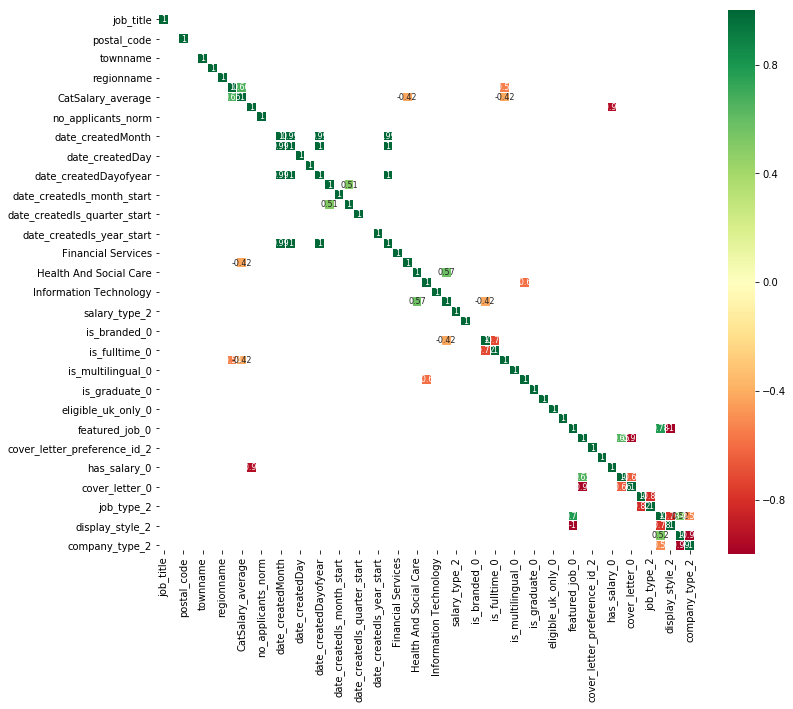

In [ ]:
# Feature-to-Feature Correlation
corr = df.drop('no_applicants', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='RdYlGn', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

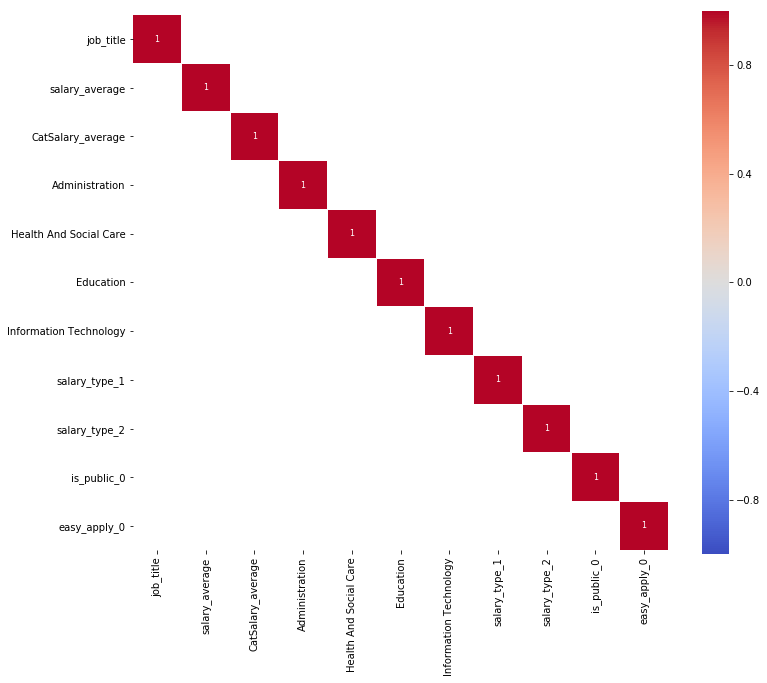

In [ ]:
best_feat = df[features_with_support]
corr =best_feat.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
# Correlations to no of applicants
from scipy import stats
print('Correlation to No of Applicants')
print('job_title:',stats.pearsonr(best_feat['job_title'],df['no_applicants'])[0])
print('CatSalary_average:',stats.pearsonr(best_feat['CatSalary_average'],df['no_applicants'])[0])
print('Administration:',stats.pearsonr(best_feat['Administration'],df['no_applicants'])[0])
print('Health And Social Care:',stats.pearsonr(best_feat['Health And Social Care'],df['no_applicants'])[0])
print('Education:',stats.pearsonr(best_feat['Education'],df['no_applicants'])[0])
print('Information Technology:',stats.pearsonr(best_feat['Information Technology'],df['no_applicants'])[0])
print('is_public_0:',stats.pearsonr(best_feat['is_public_0'],df['no_applicants'])[0])
print('salary_type_1:',stats.pearsonr(best_feat['salary_type_1'],df['no_applicants'])[0])
print('salary_average:',stats.pearsonr(best_feat['salary_average'],df['no_applicants'])[0])
print('easy_apply_0:',stats.pearsonr(best_feat['easy_apply_0'],df['no_applicants'])[0])
print('salary_type_2:',stats.pearsonr(best_feat['salary_type_2'],df['no_applicants'])[0])      

Correlation to No of Applicants
job_title: -0.13924178148365332
CatSalary_average: -0.14774008845714873
Administration: 0.3726842210295858
Health And Social Care: -0.17967841013381225
Education: -0.16747216057671424
Information Technology: -0.10830703852996094
is_public_0: 0.10489115328932604
salary_type_1: -0.07948009865953526
salary_average: -0.0772369536544085
easy_apply_0: -0.07243586650188177
salary_type_2: -0.06294365404575583


In [ ]:
# most correlated features to No of Applicants have been identified. I will feed these features into a Random Forest Regressor
# Random Forest Regression with Best Features
# Split
# Create matrix of best x features
X_best = df[['job_title', 'CatSalary_average', 'Administration',
             'Health And Social Care', 'Education', 'Information Technology', 'is_public_0', 
             'salary_type_1', 'salary_average', 'easy_apply_0', 'salary_type_2']]

# Create array of target variable
y = df['no_applicants']

# Split training data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_best,y, test_size = .20,random_state = 101)

# Fit
rforest = RandomForestRegressor(n_estimators = 300, random_state = 0) 
rforest.fit(X_best,y)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
print('Random Forest Regression Performance')
print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))

Random Forest Regression Performance
MAE 7.297573787005417
MSE 338.1496875820841
RMSE 18.38884682578231
R^2 = 0.8145206650288483


In [ ]:
x = df[['job_title', 'external_url', 'postal_code',
       'has_skills', 'townname', 'countyname', 'regionname', 'salary_average',
       'CatSalary_average', 'log_salary', 
       'date_createdYear', 'date_createdMonth', 'date_createdWeek',
       'date_createdDay', 'date_createdDayofweek', 'date_createdDayofyear',
       'date_createdIs_month_end', 'date_createdIs_month_start',
       'date_createdIs_quarter_end', 'date_createdIs_quarter_start',
       'date_createdIs_year_end', 'date_createdIs_year_start',
       'date_createdElapsed', 'Financial Services', 'Administration',
       'Health And Social Care', 'Education', 'Information Technology',
       'salary_type_1', 'salary_type_2', 'is_nationwide_0', 'is_branded_0',
       'is_parttime_0', 'is_fulltime_0', 'is_exec_role_0', 'is_multilingual_0',
       'is_public_0', 'is_graduate_0', 'show_sponsored_links_ads_0',
       'eligible_uk_only_0', 'has_formatting_0', 'featured_job_0',
       'cover_letter_preference_id_1', 'cover_letter_preference_id_2',
       'has_screening_questions_0', 'has_salary_0', 'easy_apply_0',
       'cover_letter_0', 'job_type_1', 'job_type_2', 'display_style_1',
       'display_style_2', 'company_type_1', 'company_type_2']]

y = df['no_applicants_norm']

In [ ]:
# f_regression: Used only for numeric targets and based on linear regression performance.
# f_classif: Used only for categorical targets, based on Analysis of Variance (ANOVA) statistical test.
# chi2: Performs the chi-square statistic for categorical targets, which is less sensible to the nonlinear relationship between the predictive variable and its target.

# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=20)

# Fit and transform
x_best = selector_f.fit_transform(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value enco

In [ ]:
# In choosing the percentile cutoff, I took a Pareto 80/20 approach and selected the top 20% best, associated features.
# However, I will review the F-score and p-values to confirm that 20% is an appropriate percentile 
# to exclude a feature from participating in the learning process.
support = np.asarray(selector_f.get_support())

# Enable scientific notation
pd.set_option('display.float_format', '{:.2e}'.format)

# Column names of top 20%
features = np.asarray(x.columns.values)
features_with_support = features[support]

# f-scores of top 20%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 20%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 20%
top20 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)

# top20.index.name = 'Feature'
print('Top 20% best associated features to No of Applicants\nNumber of features:',len(features_with_support))
print(top20.sort_values(by = 'p-value', ascending = 'True'))

Top 20% best associated features to No of Applicants
Number of features: 11
                        F-score   p-value
job_title              7.27e+03  0.00e+00
CatSalary_average      4.98e+03  0.00e+00
Financial Services     5.03e+03  0.00e+00
Administration         1.99e+04  0.00e+00
Health And Social Care 1.27e+04  0.00e+00
Education              1.03e+04  0.00e+00
salary_type_1          2.45e+03  0.00e+00
is_public_0            1.03e+04  0.00e+00
easy_apply_0           1.59e+03  0.00e+00
Information Technology 1.15e+03 4.94e-251
salary_average         7.79e+02 8.76e-171


In [ ]:
# most correlated features to No of Applicants have been identified. I will feed these features into a Random Forest Regressor
# Random Forest Regression with Best Features
# Split
# Create matrix of best x features
X_best = df[['job_title', 'CatSalary_average', 'Financial Services',
             'Administration', 'Health And Social Care', 'Education', 'salary_type_1', 
             'is_public_0', 'easy_apply_0', 'Information Technology', 'salary_average']]

# Create array of target variable
y = df['no_applicants_norm']

# Split training data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_best,y, test_size = .20,random_state = 101)

# Fit
rforest = RandomForestRegressor(n_estimators = 300, random_state = 0) 
rforest.fit(X_best,y)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
print('Random Forest Regression Performance')
print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))

Random Forest Regression Performance
MAE 0.334648788058988
MSE 0.21259673164201137
RMSE 0.4610821311241755
R^2 = 0.8794569850468941
